Data Visualization 
Objectives 

Inputs

Outputs



In [68]:
import PIL
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread


In [43]:
cwd=os.getcwd()

In [44]:

current_dir = os.getcwd()
current_dir

'c:\\python_projects\\project_5\\jupyter_notebooks'

In [45]:
work_dir=os.getcwd()
work_dir

'c:\\python_projects\\project_5\\jupyter_notebooks'

Set inputs directories
Set tran,validation and test path

In [65]:
my_data_dir='inputs/cherry-leaves_dataset/cherry-leaves'
train_path=my_data_dir +'/ train'
validation_path=my_data_dir + '/validation_set_ratio'
test_path=my_data_dir + '/test'

In [47]:
!dir Cherry-leaves

 Volume in drive C is OS
 Volume Serial Number is 38F8-7545

 Directory of c:\python_projects\project_5\jupyter_notebooks



File Not Found


In [56]:
import os
my_data_dir = r'c:\\python_projects\\project_5\\inputs\\cherry-leaves_dataset\\cherry-leaves'
labels = os.listdir(my_data_dir)
labels

['healthy', 'powdery_mildew', 'test', 'train', 'validation']

In [60]:
my_data_dir = r'c:\\python_projects\\project_5\\inputs\\cherry-leaves_dataset\\cherry-leaves'
labels = os.listdir(my_data_dir)

# Build data as a list of Series
rows = []

for label in labels:
    path = os.path.join(my_data_dir, label)
    if os.path.isdir(path):  # just to be safe
        count = len(os.listdir(path))
        row = pd.Series({'Set': 'Cherry-leaves', 'Label': label, 'Frequency': count})
        rows.append(row)

# Concatenate into a DataFrame
df_freq = pd.concat(rows, axis=1).T.reset_index(drop=True)

print(df_freq)

             Set           Label Frequency
0  Cherry-leaves         healthy      2104
1  Cherry-leaves  powdery_mildew      2104
2  Cherry-leaves            test         2
3  Cherry-leaves           train         2
4  Cherry-leaves      validation         2


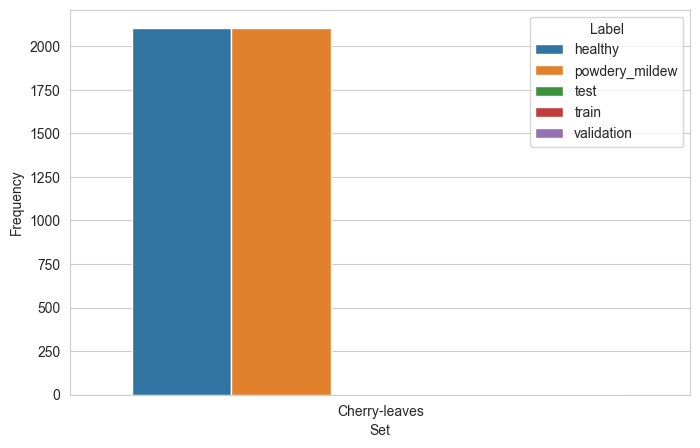

In [61]:
print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.show()

In [72]:
import itertools
import random
from matplotlib.image import imread

def image_montage(dir_path, label_to_display, nrows, ncols, figsize=(15,10)):
  """
  logic
  - if a label exists in the folder
  - check if your montage space is greater than nsubset size
  - create a list of axes indices based on nrows and ncols
  - create a Figure and display images
  - in this loop, load the image and plot the given image

  """
  sns.set_style("white")

  labels = os.listdir(train_path)

  # subset the class you are interested in displaying
  if label_to_display in labels:

    # checks if your montage space is greater than subset size
    images_list = os.listdir(dir_path+'/'+ label_to_display)
    if nrows * ncols < len(images_list):
      img_idx = random.sample(images_list, nrows * ncols)
    else:
      print(
        f"Decrease nrows or ncols to create your montage. \n"
        f"There are {len(images_list)} in your subset. "
          f"You requested a montage with {nrows * ncols} spaces")
      return
    

    # create a list of axes indices based on nrows and ncols
    list_rows= range(0,nrows)
    list_cols= range(0,ncols)
    plot_idx = list(itertools.product(list_rows,list_cols))


    # create a Figure and display images
    fig, axes = plt.subplots(nrows=nrows,ncols=ncols, figsize=figsize)
    for x in range(0,nrows*ncols):
        img = imread(dir_path + '/' + label_to_display + '/' + img_idx[x], 0)
        img_shape = img.shape
        axes[plot_idx[x][0], plot_idx[x][1]].imshow(img)
        axes[plot_idx[x][0], plot_idx[x][1]].set_title(f"Width {img_shape[1]}px x Height {img_shape[0]}px")
        axes[plot_idx[x][0], plot_idx[x][1]].set_xticks([])
        axes[plot_idx[x][0], plot_idx[x][1]].set_yticks([])
    plt.tight_layout()
    plt.show()


  else:
    print("The label you selected doesn't exist.")
    print(f"The existing options are: {labels}")

In [69]:
print(train_path)

inputs/cherry-leaves_dataset/cherry-leaves/ train


C:\Users\omer\AppData\Local\Temp\ipykernel_19964\4209317920.py:25: RuntimeWarning: Mean of empty slice.
  dim1_mean = int(np.array(dim1).mean())
C:\Users\omer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ValueError: cannot convert float NaN to integer

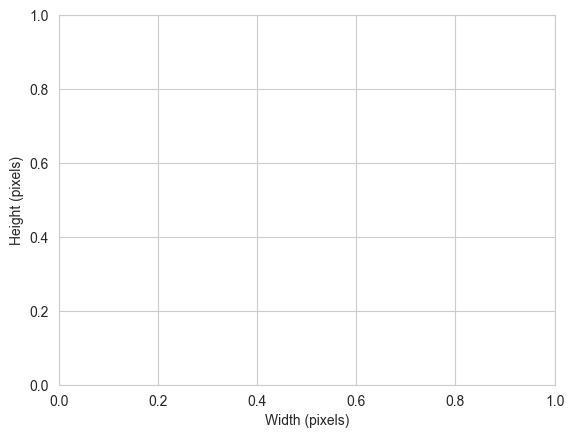

In [73]:

train_path = 'inputs/cherry-leaves_dataset/cherry-leaves/train'


dim1, dim2 = [], []

for label in labels:
    label_path = os.path.join(train_path, label)
    if not os.path.isdir(label_path):
        continue  # skip anything weird
    for image_filename in os.listdir(label_path):
        image_path = os.path.join(label_path, image_filename)
        try:
            img = imread(image_path)
            d1, d2, colors = img.shape
            dim1.append(d1)  # height
            dim2.append(d2)  # width
        except Exception as e:
            print(f"Skipping {image_path}: {e}")

sns.set_style("whitegrid")
fig, axes = plt.subplots()
sns.scatterplot(x=dim2, y=dim1, alpha=0.2)
axes.set_xlabel("Width (pixels)")
axes.set_ylabel("Height (pixels)")
dim1_mean = int(np.array(dim1).mean())
dim2_mean = int(np.array(dim2).mean())
axes.axvline(x=dim2_mean, color='r', linestyle='--')
axes.axhline(y=dim1_mean, color='r', linestyle='--')
plt.show()

print(f"Width average: {dim2_mean} \nHeight average: {dim1_mean}")

In [ ]:
image_count1 = len(list(train_path))
image_count2 = len(list(validation_path))
image_count3 = len(list(test_path))
print(image_count1)
print(image_count2)
print(image_count3)



49
63
47


Set output directory

In [ ]:
version='v1'
file_path=f'outputs/{version}'
if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Set label names

In [ ]:
labels=os.listdir(train_path)
print('Label for the images are', labels)
